# **KLASIFIKASI PENYAKIT JANTUNG 🫀**

Memprediksi apakah seorang pasien memiliki gejala penyakit jantung atau tidak berdasarkan data medis menggunakan model klasifikasi (Decision Tree, SVC, Logistic Regression).

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/MyDrive/Dataset UAS DM/heart.csv'

df = pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Dengan menggunakan perintah df.head() yang berfungsi untuk menampilkan 5 baris teratas dari dataset ini. pada dataset ini terdapat 5 column dengan masing-masing fungsi dan nama berbeda, yaitu age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, dan target.


Berikut adalah penjelasan mengenai masing-masing nama kolom, tipe data, serta penjelasan kegunaan atau isi dari kolom tersebut :

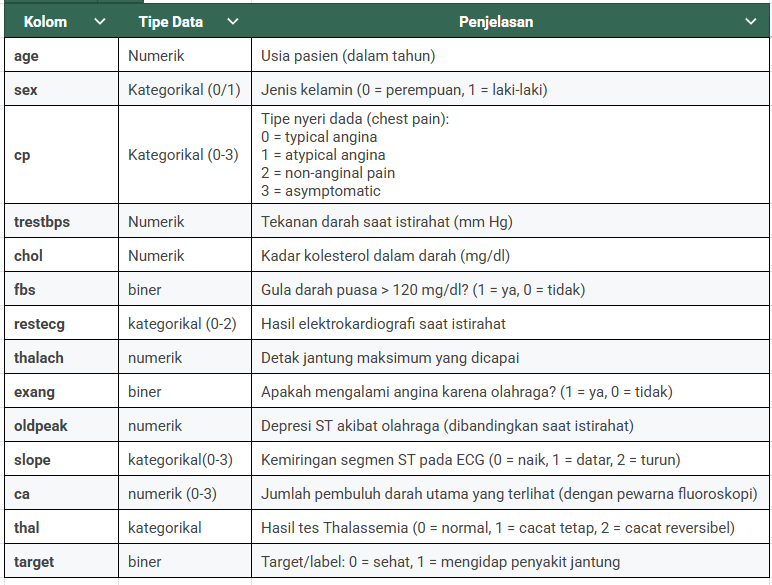

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# **MENGECEK DATA MISSING VALUE**

Dengan menggunakan perintah seperti di bawah ini, kita dapat melihat bahwa tidak adanya nilai null pada dataset ini dengan semua kolom memiliki value 0 yang menandakan bahwa tidak adanya kolom yang memiliki *missing value*


In [32]:
df.isnull().sum().sum()

np.int64(0)

# **MENGECEK NILAI DUPLIKAT PADA DATASET**

Dengan menggunakan perintah seperti di bawah ini, kita dapat melihat bahwa dataset ini memiliki **nilai duplikat sebanyak 723**. Hal ini membuat kita harus menghapus baris-baris yang teridentifikasi sebagai duplikat.

In [33]:
# Memeriksa jumlah baris duplikat
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

# Menghapus baris duplikat jika ada
df.drop_duplicates(inplace=True)

Jumlah baris duplikat: 723


Terlihat dibawah ini, jumlah baris duplikat setelah di hapus.

In [34]:
print(f"Jumlah baris duplikat setelah dihapus: {df.duplicated().sum()}")

Jumlah baris duplikat setelah dihapus: 0


In [35]:
# df_bersih adalah nama DataFrame Anda yang sudah bersih
df.to_csv('dataset_bersih.csv', index=False)

print("Dataset berhasil diekspor ke dataset_bersih.csv")

Dataset berhasil diekspor ke dataset_bersih.csv


Semula total baris pada dataset ini berjumlahkan **1025 baris**  Setelah dilakukannya cleaning terhadap baris yang mengandung nilai duplikat, maka sisa baris pada dataset ini berjumlahkan **302 baris dengan 14 kolom**.

In [36]:
df.shape

(302, 14)

# **Memisahkan Fitur (X) dan Target (y)**

In [37]:
X = df.drop('target', axis=1)
y = df['target']

Pada tahap ini kita memisahkan antara label dan atribut.  Ini adalah langkah persiapan yang wajib dilakukan sebelum melatih. Karena nilai dalam dataset memiliki rentang nilai yang berbeda-beda,kita perlu menskalakan nilainya.


# **Normalisasi Data (Scaling)**

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Tujuannya adalah agar semua fitur punya skala yang sama, sehingga algoritma machine learning (seperti KNN, SVM, atau Neural Network) bisa bekerja lebih optimal dan tidak berat sebelah ke fitur yang punya nilai besar.

# **Memisahkan dataset menjadi data training dan data testing**

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

 Dengan membagi **80%** untuk **data training** dan **20%** untuk **data testing.**
 Tujuannya adalah untuk melatih model pada data latih dan mengujinya pada data uji agar bisa mengukur performa model secara adil.

# **Melihat Apakah dataset ini Linear atau Tidak Linear**

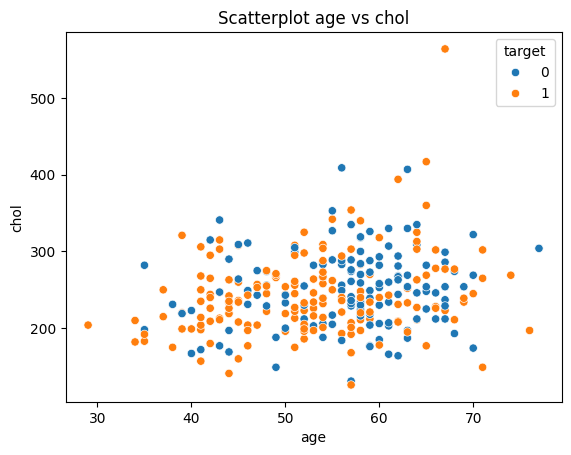

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gabungkan X dan y jadi satu dataframe
df['target'] = y

# Misal plot fitur 'age' dan 'chol' terhadap target
sns.scatterplot(data=df, x='age', y='chol', hue='target')
plt.title('Scatterplot age vs chol')
plt.show()


Hasil dari visualisasi yang telah kita buat menunjukkan bahwa data yang kita gunakan ini merupakan **data non-linear**.
Berikut hasil penjelasan dari Scattered Plot di atas :
1. Titik biru (0) dan oranye (1) tersebar saling tumpang tindih di hampir seluruh area grafik.

2. Tidak ada garis lurus (horizontal, vertikal, atau diagonal) yang bisa memisahkan secara jelas antara dua kelas (0 dan 1).

3. Artinya, kombinasi age dan chol saja tidak cukup untuk klasifikasi linear yang baik.



---


# **MELATIH MODEL MENGGUNAKAN ALGORITMA KLASIFIKASI**

Algoritma yang digunakan :
1.   Support Vector Machine
2.   Desicion Tree
3.   Regresi Logistik



# **1. Support Vector Machine (SVC)**


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Inisialisasi dan latih model SVC
model_svc = SVC(kernel='rbf', C=2)
model_svc.fit(X_train, y_train)


SVC(C=2)

Melatih model Support Vector Machine (SVM) dengan menggunakan kernel RBF (Radial Basis Function) dan parameter C=2.


*   Pada bagian **model_svc = SVC(kernel='rbf', C=2)**, kita mengatur agar model menggunakan **kernel RBF**, yaitu metode yang memungkinkan SVM membentuk garis atau batas pemisah yang melengkung untuk memisahkan data antar kelas dengan lebih baik.
*   Parameter **C=2** di sini mengontrol tingkat toleransi terhadap kesalahan: semakin besar nilainya, model akan lebih berusaha keras untuk memisahkan data dengan benar, tapi bisa berisiko **overfitting jika terlalu tinggi**.




# Uji dan Evaluasi Model SVC

In [42]:
# Prediksi menggunakan model yang dilatih
y_pred_svc = model_svc.predict(X_test)

# Menghitung confusion matrix untuk mengevaluasi kinerja model
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)

# Menghitung akurasi model
svc_acc_score = accuracy_score(y_test, y_pred_svc)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(svc_conf_matrix)
print("\n")

# Menampilkan akurasi model
print("Nilai Akurasi untuk model Support Vector Classifier:", svc_acc_score * 100, '%\n')

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

Confusion Matrix:
[[18  7]
 [ 4 32]]


Nilai Akurasi untuk model Support Vector Classifier: 81.9672131147541 %

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.82      0.89      0.85        36

    accuracy                           0.82        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



Dapat kita lihat dari hasil yang telah di cetak di atas :


*   **Confusion Matrix** : Model lebih baik dalam mengenali **kelas 1 [32 data]** (penyakit jantung), dibandingkan **kelas 0 [18 data]** (sehat).
*   **Nilai Akurasi** : Dari total **61 data uji**, sekitar **82% prediksinya benar**.
*   **Classification Report** :  Untuk kelas 1 (penderita sakit jantung), model memiliki precision **0.82**, artinya dari semua yang diprediksi sakit, **82% benar-benar sakit**. Recall-nya **0.89**, menunjukkan bahwa model berhasil mengenali **89% dari seluruh pasien yang benar-benar sakit**. F1-score sebesar **0.85** menunjukkan bahwa **prediksi model cukup akurat dan seimbang** antara ketepatan dan kelengkapan dalam mengenali pasien.



---

# **VISUALISASI CONFUSION MATRIX**





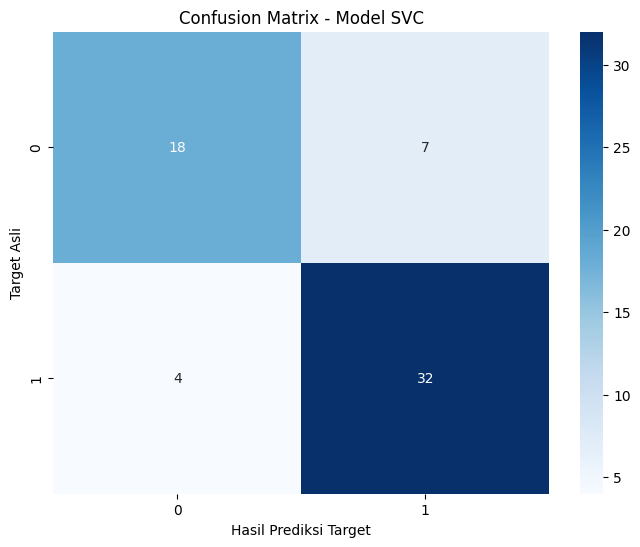

In [43]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Heatmap dengan persentase
plt.figure(figsize=(8, 6))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Model SVC")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()

Dengan visualisasi menggunakan heatmap ini hasil evaluasi model lebih mudah dibaca dan dipahami secara visual. Dapat terlihat bahwa semakin besar angkanya (seperti 32) maka akan semakin gelap warna, begitupun dengan sebaliknya(seperti 18) maka akan semakin terang warnanya.



---



# **2. Desicion Tree (Pohon Keputusan)**

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi dan latih model Decision Tree
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3)
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Parameter **criterion='entropy'** digunakan untuk memastikan pembagian data yang lebih akurat, sementara **max_depth=3** membatasi kompleksitas model untuk mencegah overfitting. Terakhir,**random_state=0** menjamin hasil yang konsisten dan dapat direproduksi. Secara keseluruhan, pengaturan ini bertujuan untuk **menciptakan model yang seimbang antara akurasi dan generalisasi**.

#  **Uji dan Evaluasi Model Decision Tree**

In [45]:
# Prediksi menggunakan model yang dilatih
y_pred_dt = model_dt.predict(X_test)

# Menghitung confusion matrix untuk mengevaluasi kinerja model
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Menghitung akurasi model
dt_acc_score = accuracy_score(y_test, y_pred_dt)

# Menampilkan confusion matrix
print("Confusion Matrix - Decision Tree:")
print(dt_conf_matrix)
print("\n")

# Menampilkan akurasi model
print("Nilai Akurasi untuk model Decision Tree:", dt_acc_score * 100, '%\n')

# Menampilkan laporan klasifikasi
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Confusion Matrix - Decision Tree:
[[17  8]
 [ 6 30]]


Nilai Akurasi untuk model Decision Tree: 77.04918032786885 %

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        25
           1       0.79      0.83      0.81        36

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



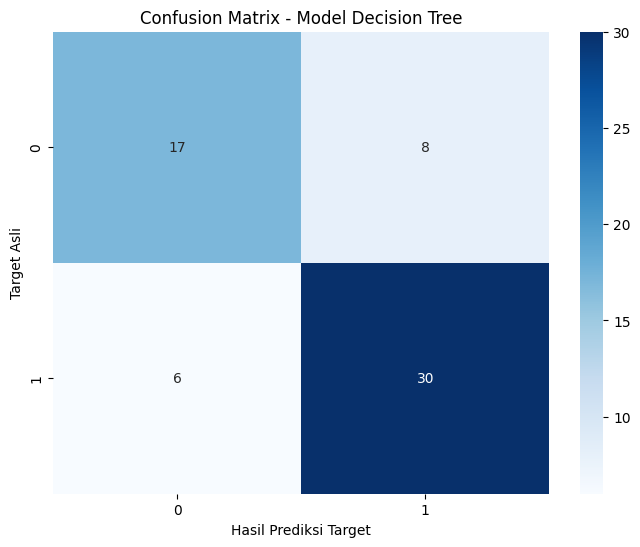

In [46]:
# Visualisasi Confusion Matrix Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Model Decision Tree")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()

**Evaluasi Model Decision Tree (Akurasi: 75.41%)**

* **Performa Keseluruhan**: Akurasi model sebesar **75.41%**, menunjukkan performa yang cukup baik namun masih di bawah model pembanding seperti SVM (82%).

* **Analisis Kesalahan Utama**:
    * **False Negative (Paling Kritis)**: Terdapat **8 pasien sakit** yang salah diprediksi sebagai sehat.
    * **False Positive**: Terdapat **7 pasien sehat** yang salah diprediksi sebagai sakit.

* **Kemampuan Prediksi per Kelas**:
    * Model lebih percaya diri saat memprediksi **pasien sakit** (Presisi 80%).
    * Namun, model ini **gagal mendeteksi 22%** dari total pasien yang benar-benar sakit (Recall 78%).

* **Kesimpulan Akhir**: Model ini cukup baik dalam mengenali pasien sakit, tetapi kelemahannya terletak pada **akurasi total yang lebih rendah** dan **tingkat False Negative yang cukup tinggi**, yang berisiko dalam konteks medis.

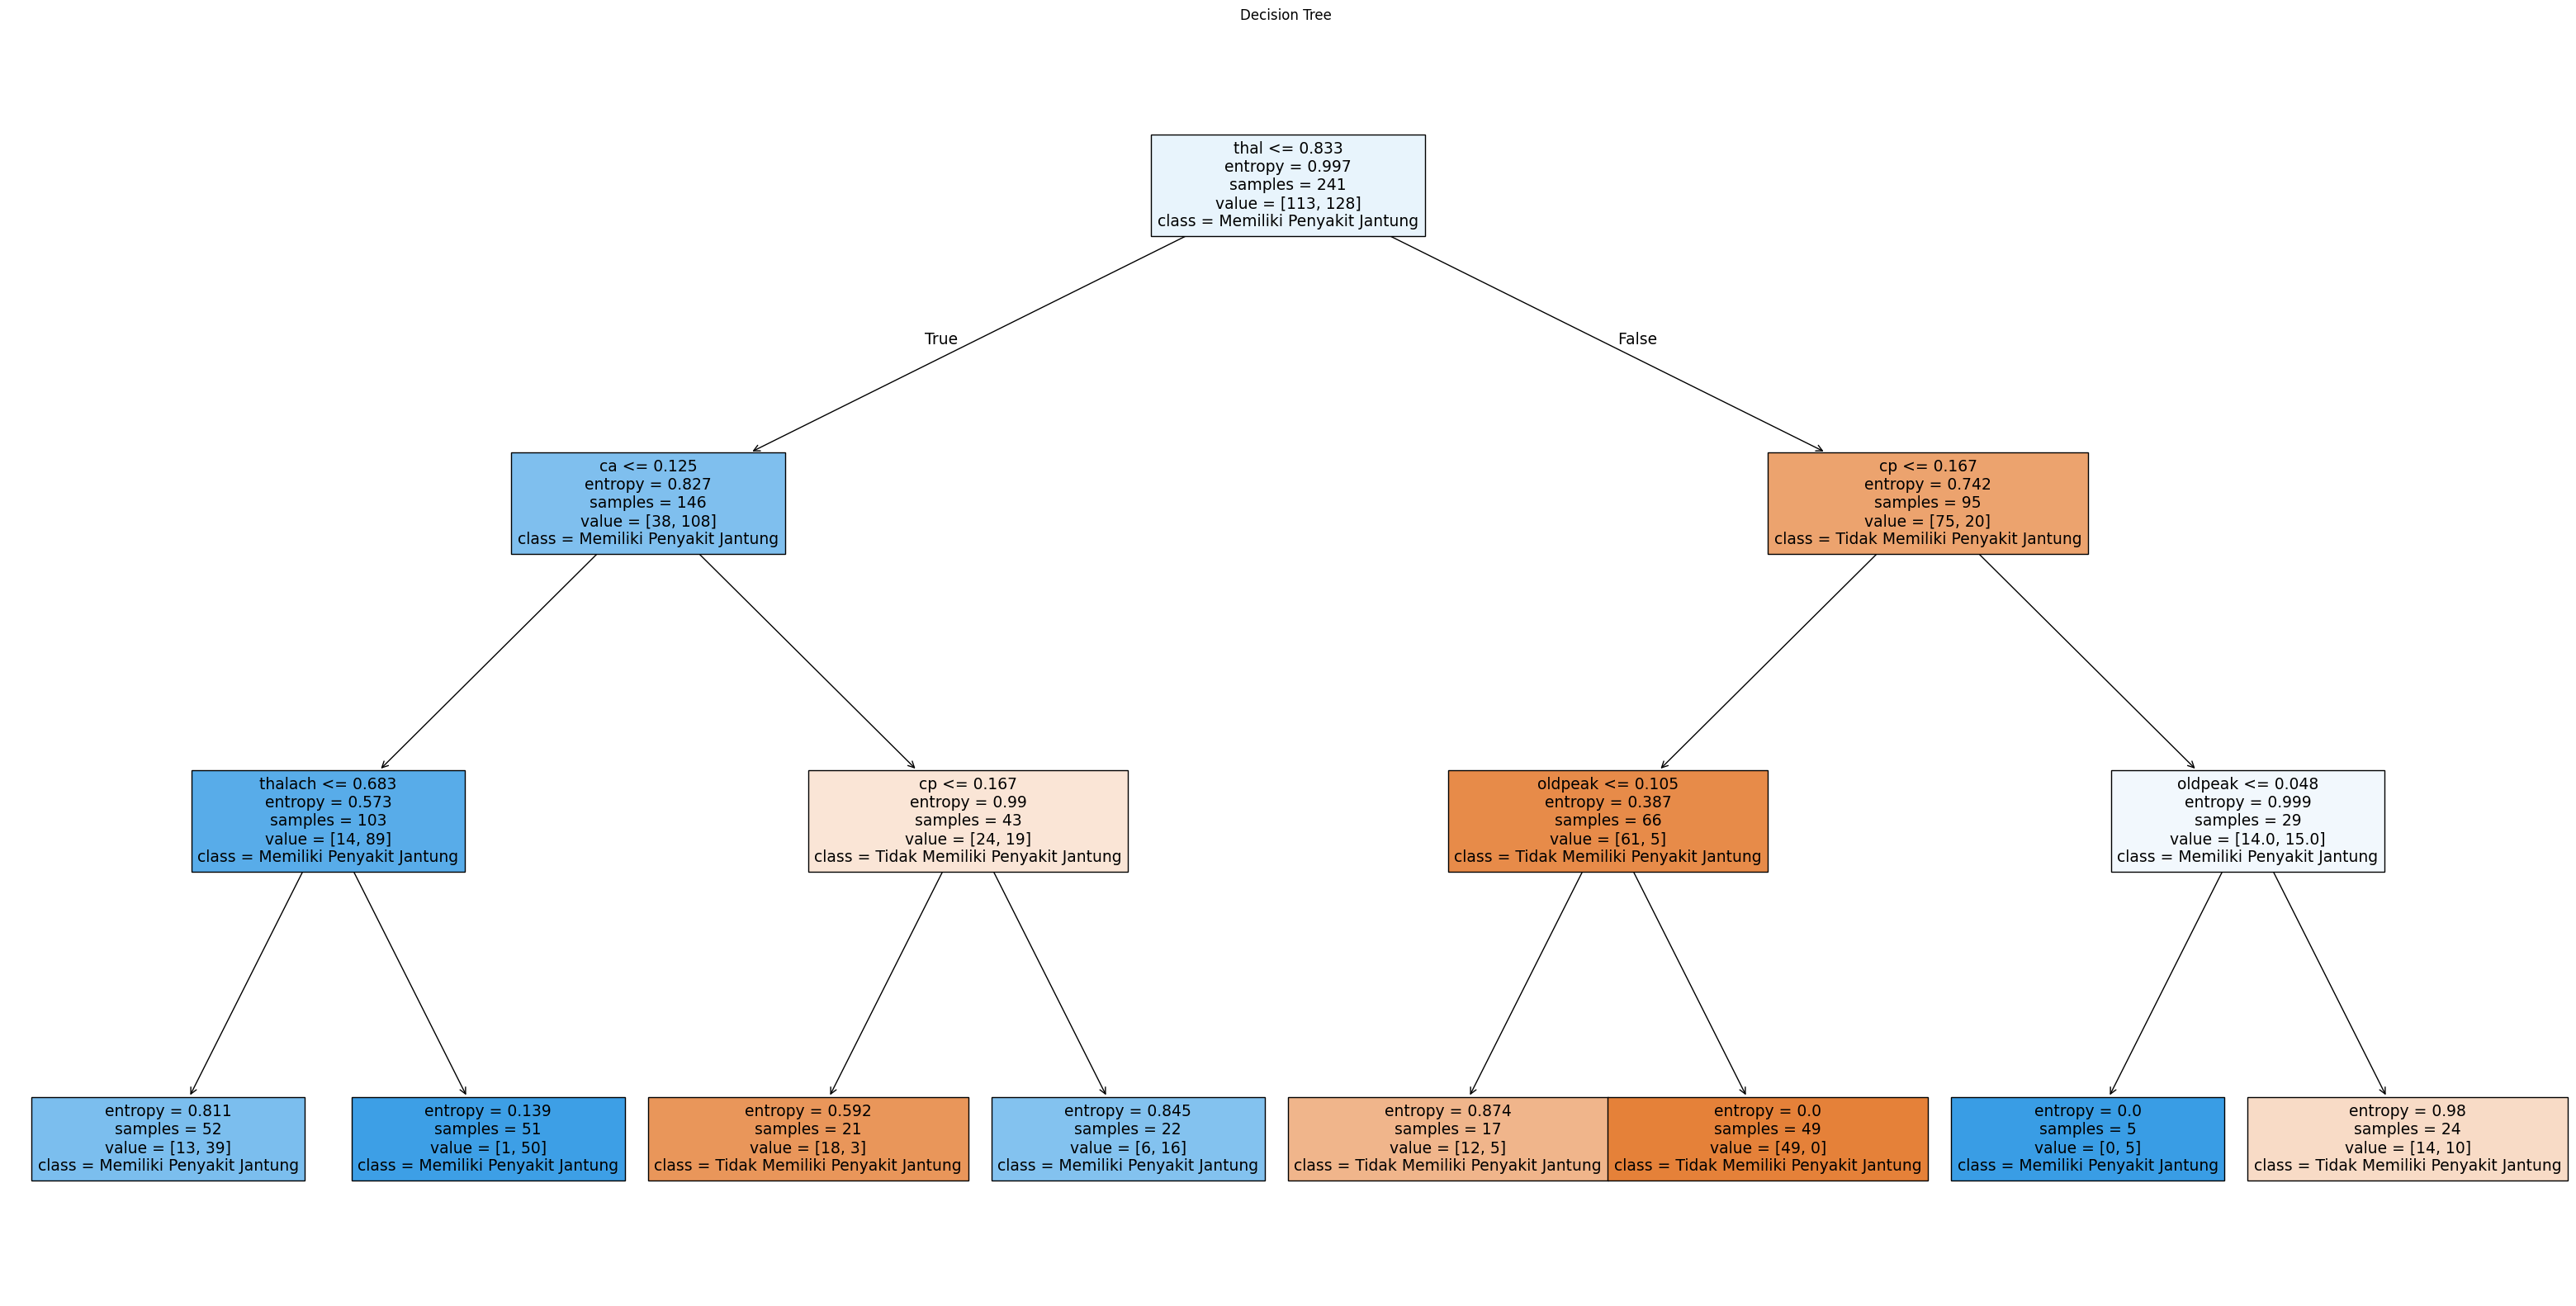

In [47]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))
plot_tree(model_dt, filled=True, feature_names=X.columns, class_names=['Tidak Memiliki Penyakit Jantung', 'Memiliki Penyakit Jantung'])
plt.title('Decision Tree ')
plt.show()

Berdasarkan pohon keputusan yang terbentuk, fitur seperti **detak jantung maksimum (thalach), jenis nyeri dada (cp), dan depresi ST (oldpeak)** merupakan faktor paling berpengaruh dalam menentukan apakah seseorang memiliki penyakit jantung atau tidak. Fitur-fitur ini muncul di bagian atas pohon dan sering digunakan untuk membagi data. Untuk mempermudah interpretasi dan menghindari overfitting, kedalaman pohon dapat dibatasi, misalnya hanya sampai **3**.


---

### Ringkasan Struktur Pohon Keputusan (Decision Tree)

* **Aturan Utama (Root Node)**: Keputusan pertama dan paling penting dibuat berdasarkan fitur **`thal`**. Kondisinya adalah `thal <= 0.833`.

* **Cabang Kiri (Jika `thal <= 0.833`)**:
    * Kelompok ini cenderung diklasifikasikan sebagai **memiliki penyakit jantung**.
    * Keputusan selanjutnya di cabang ini bergantung pada fitur `ca`.

* **Cabang Kanan (Jika `thal > 0.833`)**:
    * Kelompok ini cenderung diklasifikasikan sebagai **tidak memiliki penyakit jantung**.
    * Keputusan selanjutnya bergantung pada fitur seperti `cp` dan `oldpeak`.

* **Kesimpulan**: Fitur **`thal`** adalah pemisah paling dominan yang digunakan model untuk membedakan antara pasien berisiko tinggi dan rendah sejak awal.



---



# **3. Regresi Logistik**

In [48]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=0, max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

Kode ini digunakan untuk membangun dan melatih model **klasifikasi Regresi Logistik**. Model diatur dengan `random_state=0` untuk menjamin hasil yang konsisten dan `max_iter=1000` agar proses pelatihan berjalan optimal. Selanjutnya, melalui perintah `.fit(X_train, y_train)`, model tersebut mempelajari pola dari data latih untuk dapat membedakan antar kelas target (misalnya, sakit jantung atau tidak).

In [49]:
y_pred = model_lr.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Akurasi
acc = accuracy_score(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"\nAkurasi: {acc*100:.2f}%")
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[18  7]
 [ 6 30]]

Akurasi: 78.69%

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73        25
           1       0.81      0.83      0.82        36

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



*   Model Regresi Logistik ini menunjukkan performa yang **baik dan seimbang** dengan akurasi **78.69%**.
*   Keunggulan utamanya adalah kemampuannya dalam mendeteksi pasien sakit, di mana ia berhasil mengenali **83%** dari total kasus yang ada (Recall).

Jumlah kesalahan fatal (pasien sakit diprediksi sehat) juga relatif rendah, hanya **6 kasus**. Dengan skor Presisi, Recall, dan F1-Score yang solid (semuanya di atas 80% untuk kelas "sakit"), model ini terbukti stabil dan dapat diandalkan untuk kasus ini.



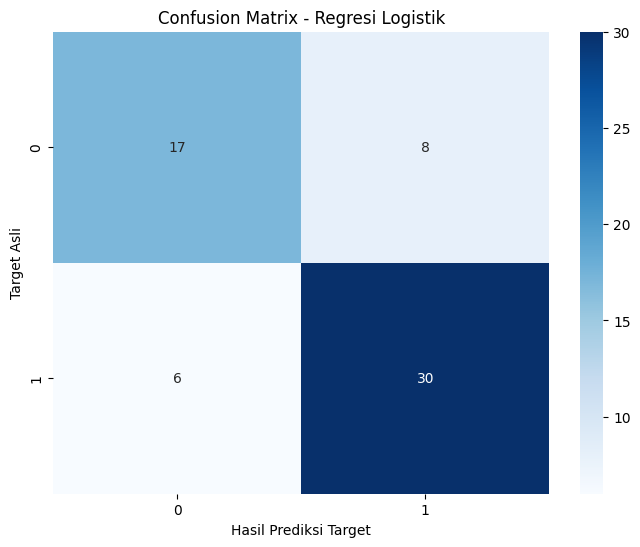

In [50]:
# Visualisasi Confusion Matrix Regresi Logistik
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Regresi Logistik")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()

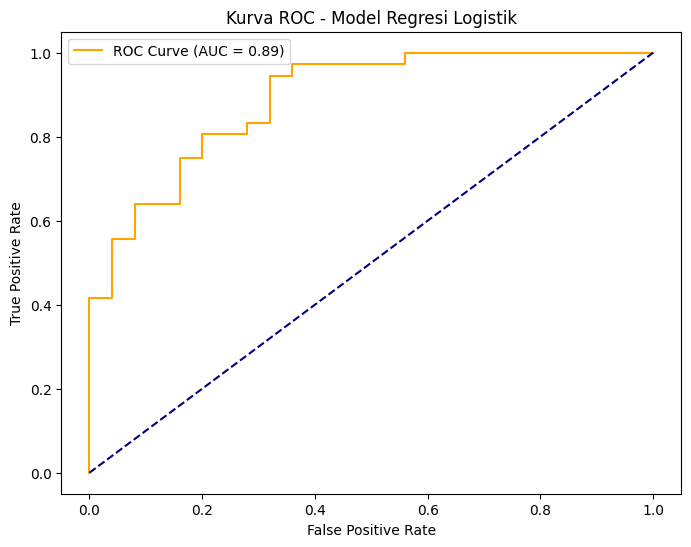

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

# Prediksi probabilitas untuk kelas 1
lr_probs = model_lr.predict_proba(X_test)[:, 1]

# Mendapatkan nilai fpr, tpr, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)

# Menghitung Area Under ROC Curve (AUC)
auc = roc_auc_score(y_test, lr_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Model Regresi Logistik')
plt.legend()
plt.show()

# PENJELASAN VISUALISASI MENGENAI REGRESI LOGISTIK DI ATAS

**ROC (Receiver Operating Characteristic) Curve** adalah grafik yang menunjukkan kemampuan model dalam membedakan antara dua kelas (sakit atau tidak sakit) pada berbagai ambang batas (threshold).



---

ROC Curve ini menunjukkan bahwa Logistic Regression sangat efektif dalam mengenali pasien yang sakit jantung dan meminimalkan kesalahan prediksi pada orang sehat. Nilai **AUC 0.89** adalah indikator kuat bahwa model ini akurat dan dapat dipercaya.



---
**PENJELASAN MENGENAI GRAFIK :**
*   Garis oranye adalah **ROC Curve dari model Logistic Regression**.
*   Semakin **tinggi kurva oranye** menjauhi garis biru, **semakin bagus model ini**.
*   Garis putus-putus biru adalah baseline (model tebak-tebakan/random, AUC = 0.5).



# **NILAI AKURASI MODEL**




In [52]:
print("\n--- Akurasi Model ---")
print(f"Akurasi SVC: {svc_acc_score*100:.2f}%")
print(f"Akurasi Decision Tree: {dt_acc_score*100:.2f}%")
print(f"Akurasi Regresi Logistik: {acc*100:.2f}%")

# Menentukan model terbaik berdasarkan akurasi
accuracies = {
    'SVC': svc_acc_score,
    'Decision Tree': dt_acc_score,
    'Regresi Logistik': acc
}

best_model = max(accuracies, key=accuracies.get)
print(f"\nModel terbaik berdasarkan akurasi adalah: {best_model}")


--- Akurasi Model ---
Akurasi SVC: 81.97%
Akurasi Decision Tree: 77.05%
Akurasi Regresi Logistik: 78.69%

Model terbaik berdasarkan akurasi adalah: SVC


# **MENGUJI MASING-MASING ALGORITMA DENGAN DATA BARU**

In [53]:
def prediksi_pasien_baru(data_baru, scaler, model_svc, model_dt, model_lr):
    """
    Melakukan prediksi data pasien baru menggunakan 3 model:
    SVC, Decision Tree, dan Logistic Regression.

    Parameters:
        data_baru (list of list): Data pasien baru dengan 13 fitur.
        scaler: Scaler yang sudah fit (contoh: MinMaxScaler).
        model_svc: Model SVC yang sudah dilatih.
        model_dt: Model Decision Tree yang sudah dilatih.
        model_lr: Model Logistic Regression yang sudah dilatih.

    Output:
        Menampilkan hasil prediksi masing-masing model dan kesimpulan akhir.
    """
    # Scaling
    data_scaled = scaler.transform(data_baru)

    # Prediksi
    pred_svc = model_svc.predict(data_scaled)[0]
    pred_dt = model_dt.predict(data_scaled)[0]
    pred_lr = model_lr.predict(data_scaled)[0]

    # Tampilkan hasil prediksi masing-masing
    print("🔍 Hasil Prediksi Model:")
    print(f"- SVC               : {pred_svc} ->", 'Memiliki Penyakit Jantung' if pred_svc == 1 else 'Tidak')
    print(f"- Decision Tree     : {pred_dt} ->", 'Memiliki Penyakit Jantung' if pred_dt == 1 else 'Tidak')
    print(f"- Regresi Logistik  : {pred_lr} ->", 'Memiliki Penyakit Jantung' if pred_lr == 1 else 'Tidak')

    # Kesimpulan akhir (berdasarkan voting mayoritas)
    total_pos = pred_svc + pred_dt + pred_lr
    if total_pos >= 2:
        kesimpulan = '✅ Pasien Memiliki Penyakit Jantung (Mayoritas)'
    else:
        kesimpulan = '✅ Pasien Tidak Memiliki Penyakit Jantung (Mayoritas)'

    print("\n Kesimpulan Akhir:")
    print(kesimpulan)


# **KASUS 1**

In [54]:
# Data pasien baru (13 fitur dalam urutan yang sesuai dataset kamu)
data_baru = [[58,0,3,130,250,125,1,140,0,12,2,0,2]]

# Panggil fungsi
prediksi_pasien_baru(data_baru, scaler, model_svc, model_dt, model_lr)


🔍 Hasil Prediksi Model:
- SVC               : 1 -> Memiliki Penyakit Jantung
- Decision Tree     : 1 -> Memiliki Penyakit Jantung
- Regresi Logistik  : 1 -> Memiliki Penyakit Jantung

 Kesimpulan Akhir:
✅ Pasien Memiliki Penyakit Jantung (Mayoritas)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [60]:
from google.colab import files
files.download('dataset_bersih.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: saya ingin download notebook ini bukan dataframenya

Maaf, saya tidak bisa mengunduh *notebook* itu sendiri. Kode yang Anda berikan di akhir, yaitu `files.download('dataset_bersih.csv')`, hanya akan mengunduh file CSV bernama 'dataset_bersih.csv' yang Anda buat di dalam *notebook*.

Untuk mengunduh seluruh *notebook* (.ipynb file) dari Google Colaboratory, Anda perlu melakukannya secara manual melalui menu di antarmuka Colaboratory:

1.  Klik pada menu **File** di bagian kiri atas.
2.  Pilih **Download**.
3.  Pilih **Download .ipynb**.

Ini akan mengunduh file *notebook* Anda ke komputer lokal.